In [1]:
#importing the packages we need for data preprocessing and data cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/User/Desktop/mini_project/framingham.csv')

In [3]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

## DATA CLEANING AND EDA

In [4]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [5]:
#checking the shape of the dataset
df.shape

(4240, 16)

In [6]:
#checking the datatypes of the attributes in the dataset
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
#checking of any duplicates entries in the dataset
df[df.duplicated()]

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [8]:
#we can see that we do  ot have any duplicated rows in the entries, we are good to go.

In [9]:
#checking for missing values in the dataset
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
#there are quite a few missing values in the data.
#let's see the rows which contain the missing values
null = df[df.isna().any(axis=1)]
null

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
14       0   39        2.0              1         9.0     0.0   
21       0   43        1.0              0         0.0     0.0   
26       0   60        1.0              0         0.0     0.0   
33       1   61        NaN              1         5.0     0.0   
36       1   56        NaN              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4208     0   51        1.0              1         9.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0              1         3.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
14                  0             0         0    226.0  114.0   64.0  22.35   
21                  0             0         0    185.0  123.5   77.5  29.89   
26                  0             0         0    260.0  110.0   72.5  26.59   
33                  0             0         0    175.0  134.0   82.5  18.59   
36                  0             0         0    257.0  153.5  102.0  28.09   
...               ...           ...       ...      ...    ...    ...    ...   
4208                0             0         0    340.0  152.0   76.0  25.74   
4229                0             1         0    251.0  140.0   80.0  25.60   
4230                0             1         0    268.0  170.0  102.0  22.89   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   

      heartRate  glucose  TenYearCHD  
14         85.0      NaN           0  
21         70.0      NaN           0  
26         65.0      NaN           0  
33         72.0     75.0           1  
36         72.0     75.0           0  
...         ...      ...         ...  
4208       70.0      NaN           0  
4229       75.0      NaN           0  
4230       57.0      NaN           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  

[582 rows x 16 columns]

In [11]:
#there are 3 ways to deal with the missing values:
#   1.ignore the missing values
#   2.drop all the rows which contain the missing values
#   3.fill in the missing values with random values,guesses,mean values of the coloumn etc.


# Let's try to fill in the missing values with the mean values of the columns

df.fillna(df.mean())

male  age  education  currentSmoker  cigsPerDay    BPMeds  \
0        1   39        4.0              0         0.0  0.000000   
1        0   46        2.0              0         0.0  0.000000   
2        1   48        1.0              1        20.0  0.000000   
3        0   61        3.0              1        30.0  0.000000   
4        0   46        3.0              1        23.0  0.000000   
...    ...  ...        ...            ...         ...       ...   
4235     0   48        2.0              1        20.0  0.029615   
4236     0   44        1.0              1        15.0  0.000000   
4237     0   52        2.0              0         0.0  0.000000   
4238     1   40        3.0              0         0.0  0.000000   
4239     0   39        3.0              1        30.0  0.000000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate     glucose  TenYearCHD  
0          80.0   77.000000           0  
1          95.0   76.000000           0  
2          75.0   70.000000           0  
3          65.0  103.000000           1  
4          85.0   85.000000           0  
...         ...         ...         ...  
4235       84.0   86.000000           0  
4236       86.0   81.963655           0  
4237       80.0  107.000000           0  
4238       67.0   72.000000           0  
4239       85.0   80.000000           0  

[4240 rows x 16 columns]

In [12]:
df=df.fillna(df.mean())
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
#From above we can see that we successfully filled all the missing values with the mean values of the columns

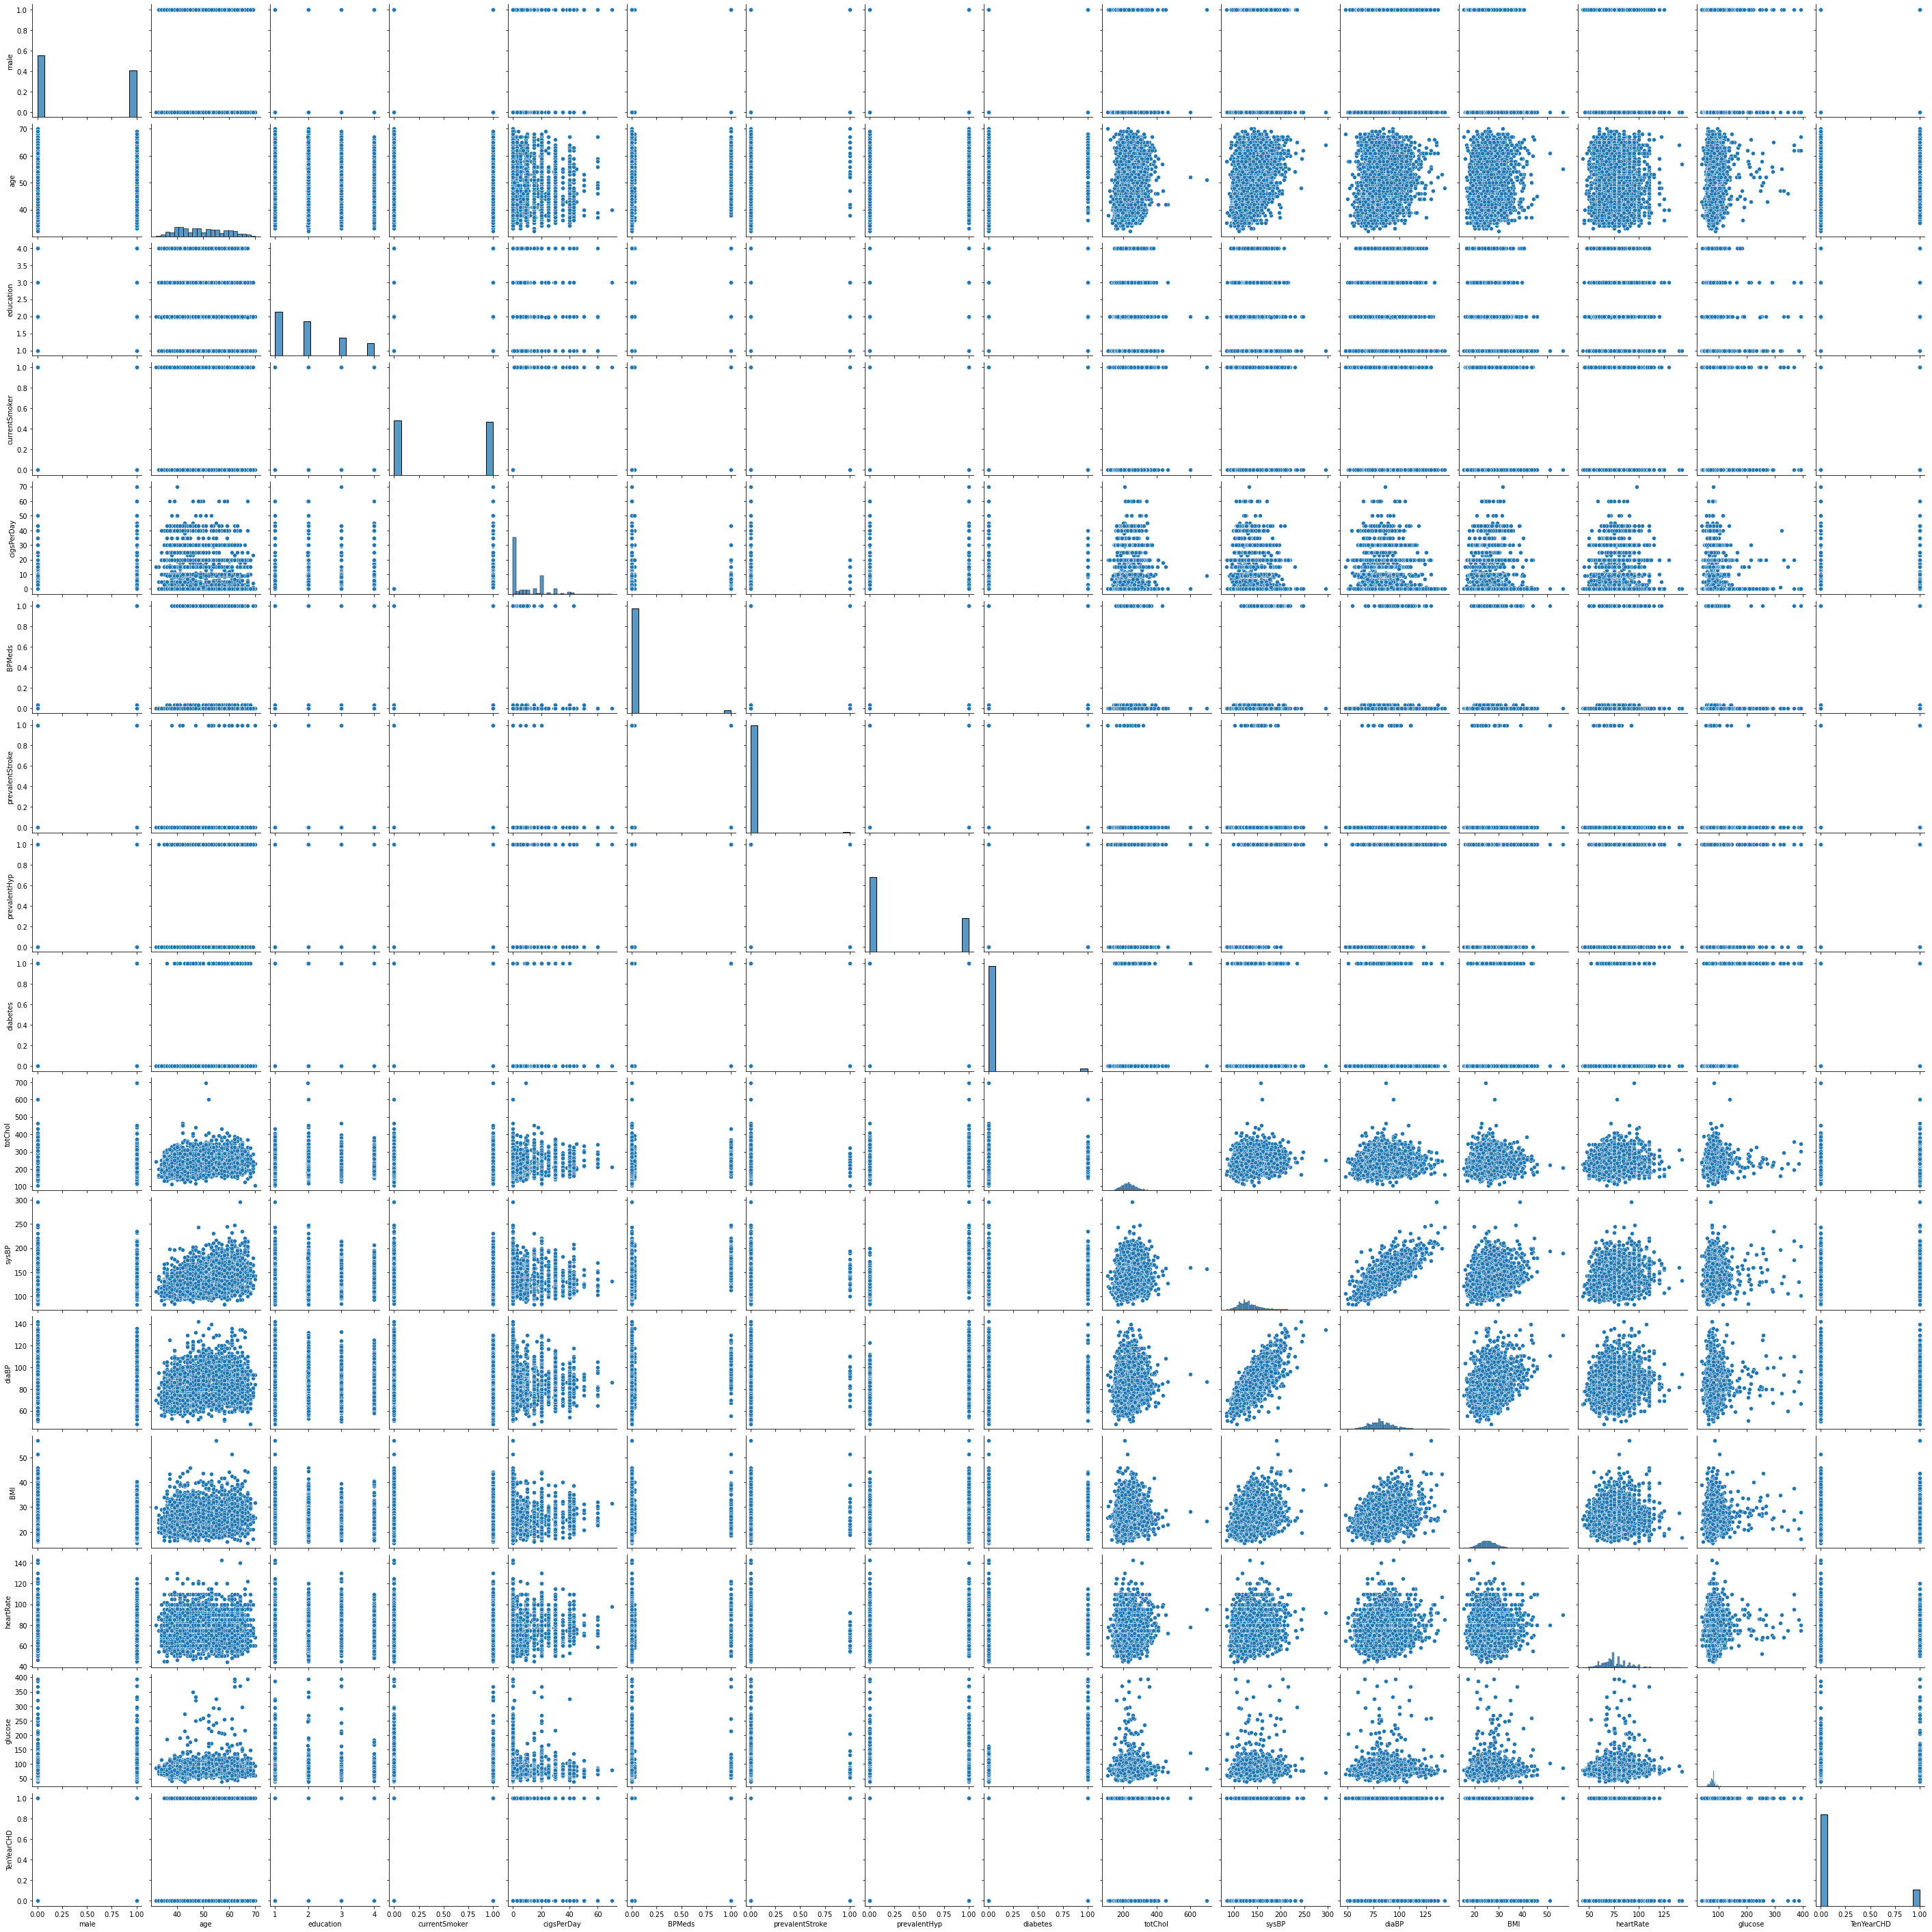

In [31]:
sns.pairplot(df)

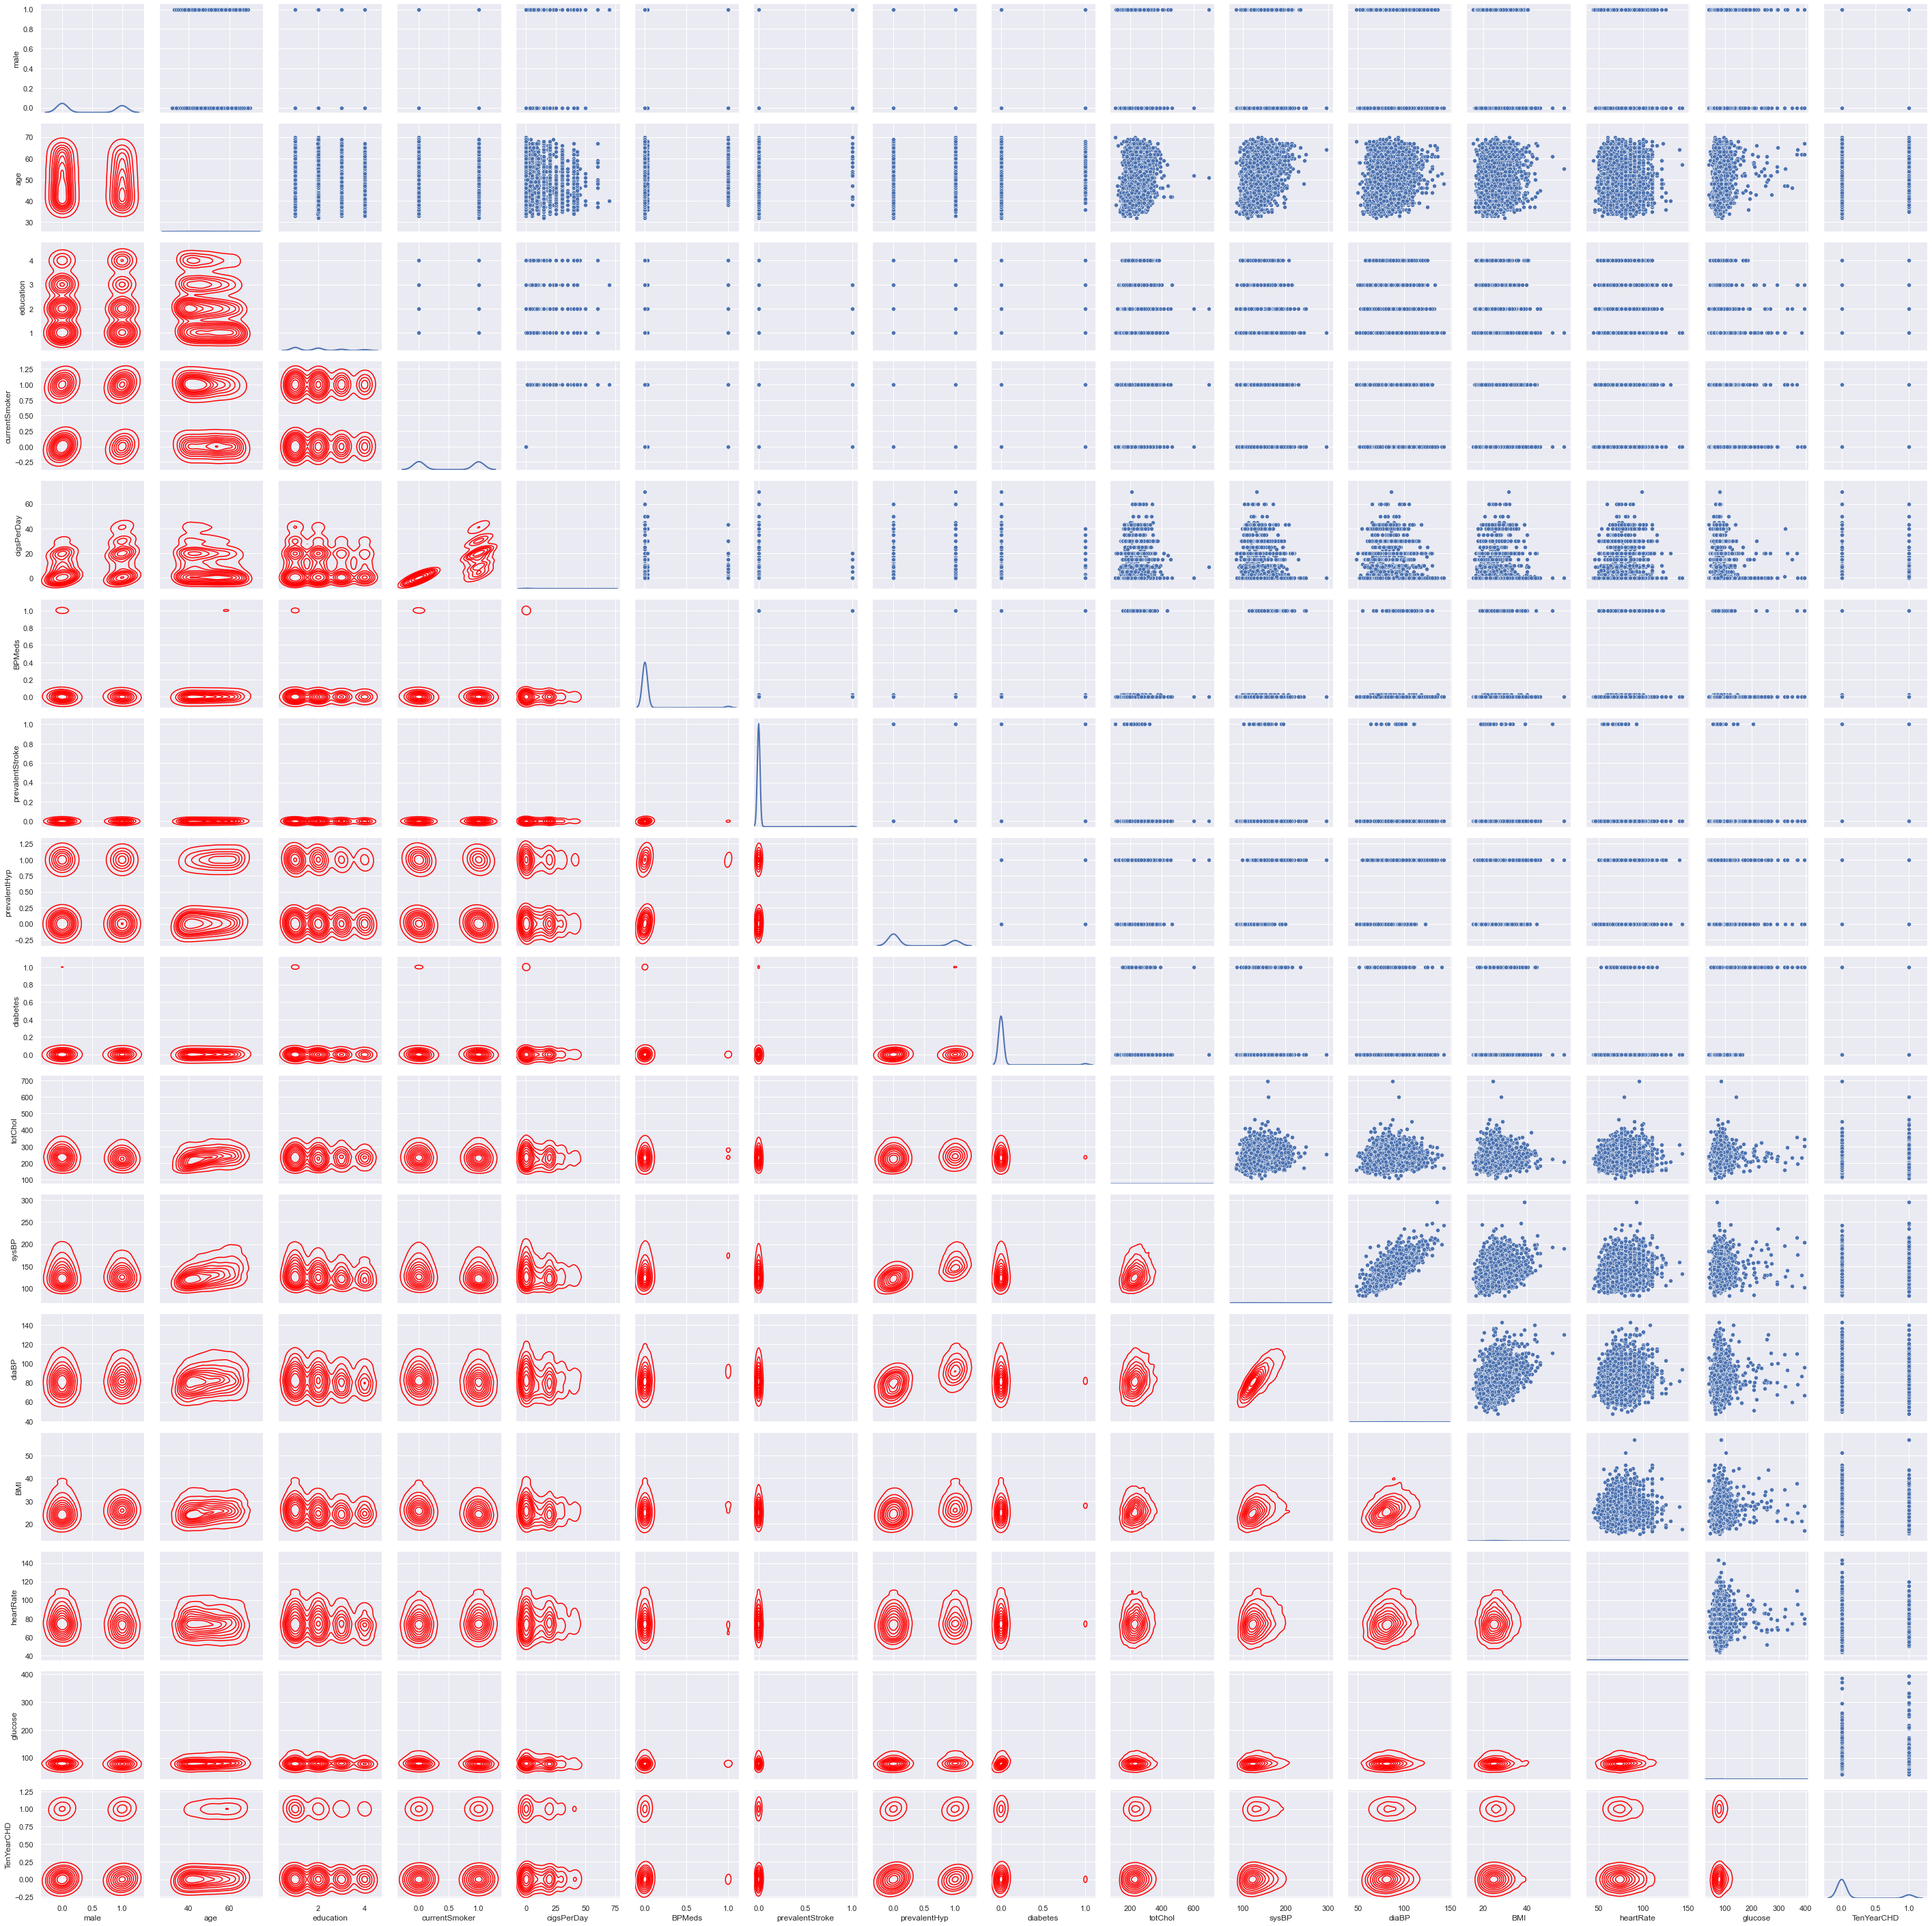

In [34]:
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot, lw=2)
g = g.map_lower(sns.kdeplot, colors="red")

In [390]:
#Let's check the correlation between the attributes
df.corr()

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029014   0.017188       0.197026    0.316023   
age             -0.029014  1.000000  -0.164081      -0.213662   -0.192534   
education        0.017188 -0.164081   1.000000       0.018297    0.008197   
currentSmoker    0.197026 -0.213662   0.018297       1.000000    0.767055   
cigsPerDay       0.316023 -0.192534   0.008197       0.767055    1.000000   
BPMeds          -0.052203  0.122036  -0.010689      -0.048621   -0.045847   
prevalentStroke -0.004550  0.057679  -0.035139      -0.032980   -0.032711   
prevalentHyp     0.005853  0.306799  -0.080753      -0.103710   -0.066444   
diabetes         0.015693  0.101314  -0.038214      -0.044285   -0.037086   
totChol         -0.070064  0.260691  -0.022993      -0.046211   -0.026182   
sysBP           -0.035879  0.394053  -0.128126      -0.130281   -0.088523   
diaBP            0.058199  0.205586  -0.061362      -0.107933   -0.056473   
BMI              0.081705  0.135578  -0.135876      -0.167483   -0.092888   
heartRate       -0.116913 -0.012839  -0.053603       0.062678    0.075257   
glucose          0.005718  0.116951  -0.033837      -0.054062   -0.056020   
TenYearCHD       0.088374  0.225408  -0.053571       0.019448    0.057646   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052203        -0.004550      0.005853  0.015693 -0.070064   
age              0.122036         0.057679      0.306799  0.101314  0.260691   
education       -0.010689        -0.035139     -0.080753 -0.038214 -0.022993   
currentSmoker   -0.048621        -0.032980     -0.103710 -0.044285 -0.046211   
cigsPerDay      -0.045847        -0.032711     -0.066444 -0.037086 -0.026182   
BPMeds           1.000000         0.115008      0.259125  0.051584  0.078973   
prevalentStroke  0.115008         1.000000      0.074791  0.006955  0.000105   
prevalentHyp     0.259125         0.074791      1.000000  0.077752  0.162683   
diabetes         0.051584         0.006955      0.077752  1.000000  0.040161   
totChol          0.078973         0.000105      0.162683  0.040161  1.000000   
sysBP            0.252023         0.057000      0.696656  0.111265  0.207436   
diaBP            0.192387         0.045153      0.615840  0.050260  0.163423   
BMI              0.099586         0.024856      0.300599  0.086282  0.115013   
heartRate        0.015172        -0.017674      0.146777  0.048986  0.090678   
glucose          0.048925         0.018065      0.082757  0.605709  0.044710   
TenYearCHD       0.086805         0.061823      0.177458  0.097344  0.081807   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035879  0.058199  0.081705  -0.116913  0.005718    0.088374  
age              0.394053  0.205586  0.135578  -0.012839  0.116951    0.225408  
education       -0.128126 -0.061362 -0.135876  -0.053603 -0.033837   -0.053571  
currentSmoker   -0.130281 -0.107933 -0.167483   0.062678 -0.054062    0.019448  
cigsPerDay      -0.088523 -0.056473 -0.092888   0.075257 -0.056020    0.057646  
BPMeds           0.252023  0.192387  0.099586   0.015172  0.048925    0.086805  
prevalentStroke  0.057000  0.045153  0.024856  -0.017674  0.018065    0.061823  
prevalentHyp     0.696656  0.615840  0.300599   0.146777  0.082757    0.177458  
diabetes         0.111265  0.050260  0.086282   0.048986  0.605709    0.097344  
totChol          0.207436  0.163423  0.115013   0.090678  0.044710    0.081807  
sysBP            1.000000  0.783952  0.325172   0.182084  0.134561    0.216374  
diaBP            0.783952  1.000000  0.376317   0.181012  0.058499    0.145112  
BMI              0.325172  0.376317  1.000000   0.067318  0.082123    0.074788  
heartRate        0.182084  0.181012  0.067318   1.000000  0.089386    0.022892  
glucose          0.134561  0.058499  0.082123   0.089386  1.000000    0.120451  
TenYearCHD       0.216374  0.145112  0.074788   0.0228

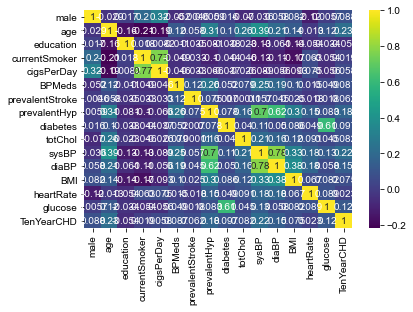

In [14]:
#let's visualize this correlation with the help of a heatmap
sns.heatmap(df.corr(),annot=True,cmap="viridis")
sns.set(rc = {'figure.figsize':(20,20)})

In [15]:
# from the attributes, the education seems less correalated with the orders, so let's go ahead and drop it
df = df.drop(['education'], axis=1)

## FEATURE SELECTION

In [16]:
# Identify the features with the most importance for the outcome variable Heart Disease
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  
y = df.iloc[:,-1]    

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

#print 10 best features
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs       Score
9             sysBP  727.935535
13          glucose  391.151105
1               age  319.266019
8           totChol  235.502392
3        cigsPerDay  220.812679
10            diaBP  152.748563
6      prevalentHyp   92.048736
7          diabetes   39.144944
4            BPMeds   30.615014
0              male   18.899930
5   prevalentStroke   16.109887


In [17]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score
9             sysBP  727.935535
13          glucose  391.151105
1               age  319.266019
8           totChol  235.502392
3        cigsPerDay  220.812679
10            diaBP  152.748563
6      prevalentHyp   92.048736
7          diabetes   39.144944
4            BPMeds   30.615014
0              male   18.899930
5   prevalentStroke   16.109887
11              BMI   15.227367
12        heartRate    4.232372
2     currentSmoker    0.811334

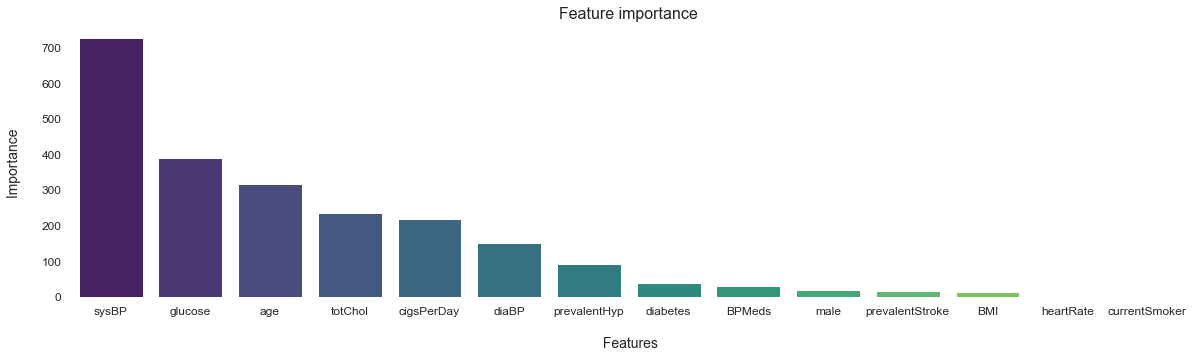

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "viridis")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [19]:
#Now we are going to select the top 10 features that are important 
df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
0  106.0     77.0   39    195.0         0.0   70.0             0         0   
1  121.0     76.0   46    250.0         0.0   81.0             0         0   
2  127.5     70.0   48    245.0        20.0   80.0             0         0   
3  150.0    103.0   61    225.0        30.0   95.0             1         0   
4  130.0     85.0   46    285.0        23.0   84.0             0         0   

   BPMeds  male  TenYearCHD  
0     0.0     1           0  
1     0.0     0           0  
2     0.0     1           0  
3     0.0     0           1  
4     0.0     0           0

In [20]:
# Now that we have identified the important features of the dataset, lets check if we have any outliers
df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000  4240.000000  4240.000000   
mean    132.354599    81.963655    49.580189   236.699523     9.005937   
std      22.033300    22.831748     8.572942    44.327521    11.881610   
min      83.500000    40.000000    32.000000   107.000000     0.000000   
25%     117.000000    72.000000    42.000000   206.000000     0.000000   
50%     128.000000    80.000000    49.000000   234.000000     0.000000   
75%     144.000000    85.000000    56.000000   262.000000    20.000000   
max     295.000000   394.000000    70.000000   696.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  4240.000000   4240.000000  4240.000000  4240.000000  4240.000000   
mean     82.897759      0.310613     0.025708     0.029615     0.429245   
std      11.910394      0.462799     0.158280     0.168481     0.495027   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


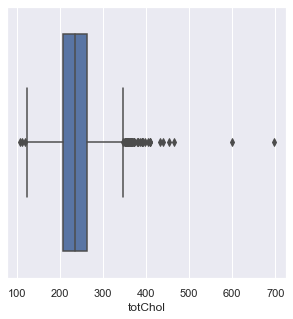

In [22]:
#we can see that the total cholestrol column looks like it might have some outliers. 
#Let's plot a boxplot to see if this is true
sns.boxplot(df.totChol)
sns.set(rc = {'figure.figsize':(5,5)})

In [23]:
#let's drop the far way outliers
df = df.drop(df[df.totChol > 599].index)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sysBP'>

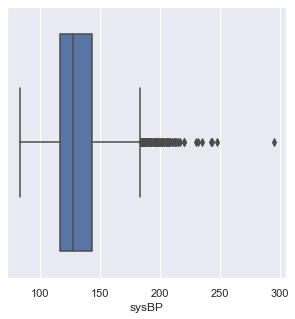

In [24]:
#Let's check for sysBP
sns.boxplot(df.sysBP)

In [25]:
df = df.drop(df[df.sysBP > 350].index)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diaBP'>

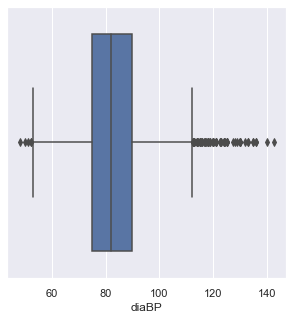

In [26]:
sns.boxplot(df.diaBP)

In [27]:
#the other features do not have really large outliers so let's ignore them

## FEATURE SCALING

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [29]:
df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean      0.230933     0.118501     0.462613     0.362760     0.128687   
std       0.104167     0.064462     0.225654     0.121611     0.169766   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.158392     0.090395     0.263158     0.277311     0.000000   
50%       0.210402     0.112994     0.447368     0.355742     0.000000   
75%       0.285461     0.127119     0.631579     0.434174     0.285714   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  4238.000000   4238.000000  4238.000000  4238.000000  4238.000000   
mean      0.369250      0.310288     0.025484     0.029629     0.429212   
std       0.126051      0.462666     0.157608     0.168520     0.495022   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.285714      0.000000     0.000000     0.000000     0.000000   
50%       0.359788      0.000000     0.000000     0.000000     0.000000   
75%       0.443122      1.000000     0.000000     0.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151723  
std       0.358794  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [30]:
# Let's split the data into the training and testing data
# We will use 80% of the data for training and remaining 20% from testing
from sklearn.model_selection import train_test_split

X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## KNN CLASSIFIER

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
#Choosing the k value with elbow method
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

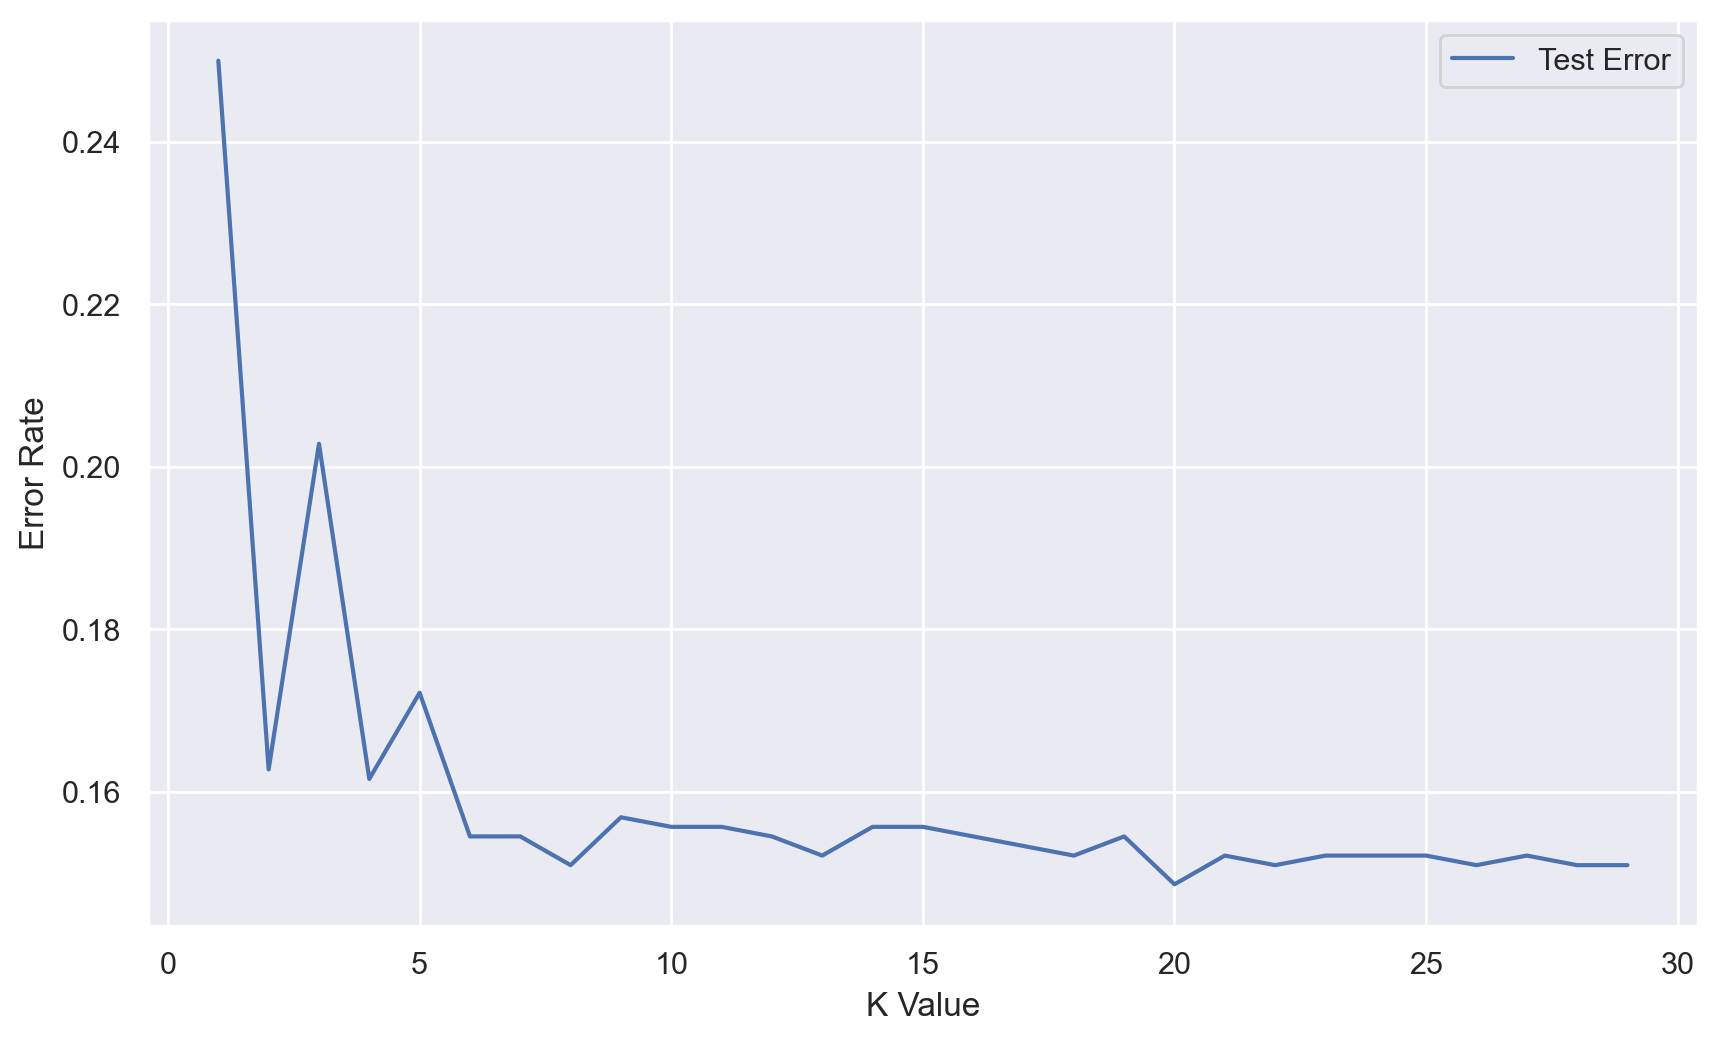

In [33]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [34]:
# choosing k using pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()
operations = [('scaler',scaler),('knn',knn)]


In [35]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [36]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [37]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [44]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.77256637, 0.83716814, 0.82418879, 0.84188791, 0.83185841,
       0.84365782, 0.84218289, 0.84749263, 0.84572271, 0.84660767,
       0.84336283, 0.84719764, 0.84660767, 0.84867257, 0.84837758,
       0.8480826 , 0.8460177 , 0.84719764, 0.84690265])

In [45]:
knn = KNeighborsClassifier(n_neighbors = 14)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)

In [46]:
knn_predict=knn.predict(X_test)

In [48]:
acc = accuracy_score(y_test, knn_predict)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

The accuracy score for KNN is: 84.39999999999999%


## DECISION TREES

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
base_pred = dt_model.predict(X_test)

In [50]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       720
         1.0       0.18      0.23      0.20       128

    accuracy                           0.72       848
   macro avg       0.52      0.52      0.52       848
weighted avg       0.75      0.72      0.74       848



In [51]:
acc = accuracy_score(y_test, base_pred)
print(f"The accuracy score for Decision Trees is: {round(acc,3)*100}%")

The accuracy score for Decision Trees is: 72.39999999999999%


## K-MEANS CLUSTERING

In [52]:
from sklearn.cluster import KMeans
#CHOOSING THE RIGHT K VALUE
scaled_X = scaler.fit_transform(X)
ssd = []

for k in range(2,30):
    
    kmodel = KMeans(n_clusters=k)
    
    
    kmodel.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(kmodel.inertia_)


Text(0, 0.5, ' Sum of Squared Distances')

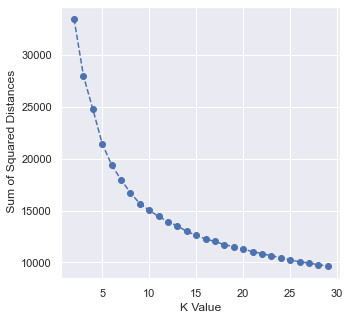

In [53]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<AxesSubplot:>

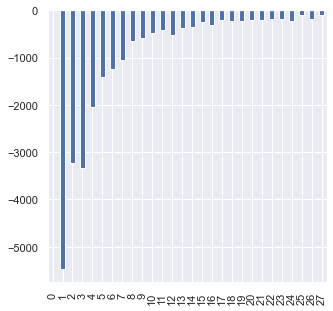

In [54]:
pd.Series(ssd).diff().plot(kind='bar')

#### One could say that there is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this). What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!

In [55]:
kmodel = KMeans(n_clusters=3)
kmodel.fit(scaled_X)

KMeans(n_clusters=3)

In [56]:
base_pred = kmodel.predict(X_test)

In [57]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.72      0.80       720
         1.0       0.25      0.52      0.33       128

    accuracy                           0.69       848
   macro avg       0.57      0.62      0.57       848
weighted avg       0.80      0.69      0.73       848



In [58]:
acc = accuracy_score(y_test, base_pred)
print(f"The accuracy score for K-Means is: {round(acc,3)*100}%")


The accuracy score for K-Means is: 68.89999999999999%


## RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
rmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [60]:
preds = rmodel.predict(X_test)

In [61]:
confusion_matrix(y_test,preds)

array([[691,  29],
       [115,  13]], dtype=int64)

In [62]:
acc = accuracy_score(y_test, preds)
print(f"The accuracy score for Random Forests is: {round(acc,3)*100}%")


The accuracy score for Random Forests is: 83.0%


In [63]:
test_error = []

for n in range(1,40):
    # Use n random trees
    rmodel = RandomForestClassifier(n_estimators=n,max_features='auto')
    rmodel.fit(X_train,y_train)
    test_preds = rmodel.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

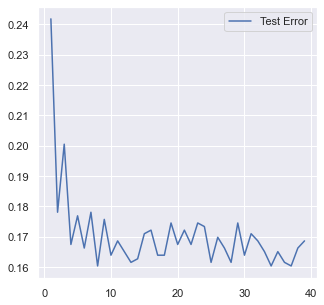

In [64]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [65]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [66]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [67]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [68]:
grid.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8480826  0.84690265 0.84926254 0.84955752 0.84985251 0.84837758
 0.84896755 0.84867257 0.84719764 0.84572271 0.84749263 0.84572271
 0.84365782 0.84837758 0.84896755 0.84926254 0.84749263 0.84631268
 0.84749263 0.84749263 0.84660767 0.84749263 0.8480826  0.84778761
        nan 0.84218289        nan 0.84011799        nan 0.84100295
        nan 0.84277286        nan 0.83775811        nan 0.83923304
        nan 0.84041298        nan 0.84041298        nan 0.83775811
        nan 0.83569322        nan 0.83569322        nan 0.83539823]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [69]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [70]:
predictions = grid.predict(X_test)

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       720
         1.0       0.33      0.05      0.09       128

    accuracy                           0.84       848
   macro avg       0.59      0.52      0.50       848
weighted avg       0.78      0.84      0.79       848



In [72]:
acc = accuracy_score(y_test, predictions)
print(f"The accuracy score for Random Rofests is: {round(acc,3)*100}%")

The accuracy score for Random Rofests is: 84.1%


# Result: The KNN model has the highest accuracy score

In [73]:
#let's make sure that the model does not overfit
acc_test = knn_model.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn_model.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")


The accuracy score of the test data is:  84.90566037735849 %
The accuracy score of the training data is:  85.07 %


In [74]:
#the accuracy scores of the training and testing data are almost similar hence the model does not seem to overfit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## APPLICATION

In [75]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)
normalized_df_knn_pred = knn.predict(X_test)

In [76]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
Patient's age: >>> 35
Patient's gender. male=1, female=0: >>> 1
Patient's smoked cigarettes per day: >>> 1
Patient's systolic blood pressure: >>> 77
Patient's diastolic blood pressure: >>> 86
Patient's cholesterin level: >>> 78
Was Patient hypertensive? Yes=1, No=0 >>> 0
Did Patient have diabetes? Yes=1, No=0 >>> 0
What is the Patient's glucose level? >>> 76
Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> 0


Result:
The patient will not develop a Heart Disease.
